# A model of a magnet

## Motivation

In 1895 **Pierre Curie** did his PhD thesis at ESPCI, where he studied **magnetic** properties of materials. In a famous experiment he discovered that magnet looses its magnetic properties once it is heated beyond a certain temperature, now known as **the Curie temperature** (a very nice short film about this can be found here https://www.youtube.com/watch?v=kq--MPqlqwY).

You will study a simple model that captures this phenomenon! The intuition behind the model is that **domains** form in a magnetic material. In each domain the microscopic degrees of freedom (i.e., electron spins) align to produce a magnetic moment in a certain direction (see image below). Due to aggitation of spins at finite temperature, a domain may change the direction of its magnetic moment but also its size.

<img src='https://drive.google.com/uc?id=1jpfTCIQDrDhn9Li427IUs7wCwh0m_KQV'>

## The Ising model

Our model, named after the physicist **Ernst Ising**, who studied it in his 1924 PhD thesis, is a mathematical model of magnetism. The model simplifies the above intuition by imagining all the domains are the same size and regularly arranged (i.e., on a square lattice in 2-dimensions), while all the magnetic moments are parallel and along one axis (e.g. y-axis). Therefore the model describes each domain by a single **discrete variable** that can be in one of two states: $+1$ or $−1$ meaning that the moment points e.g. along positive or negative y-axis (see image below). We will call this variable **spin** with $+1/-1$ being "up"/"down".

<img src='https://drive.google.com/uc?id=1_hCYc7T8O7xERGG-BMyuQEALAXOfC-0n'>

Each spin interacts with its nearest neighbors (there are 4 of them on our square lattice, see image above). The model is defined by the total energy of these pairwise interactions between spins. In the so-called **ferromagnetic** Ising model (corresponding to ferromagnetic material such as iron Fe), neighboring spins have a lower **interaction energy** when they are of the same sign (i.e., both up or both down) and higher **interaction energy** when of opposite sign (i.e., one up and one down). The total Ising energy is:

$E = -J\sum_{<ij>}S_iS_j - B\sum_{i}S_i$ 

where $S_{i}=\pm1$ are spins arranged on a square lattice, the sum $\sum_{<ij>}$ is over **four** nearest neighbors $j$ of a spin $i$ (see image above), each pair summed only once. $J$ is called the interaction energy and assumed $J>0$ for the ferromagnetic model. $B$ represents an **external magnetic field** which tends to align the spins along its direction. The sum $M = \sum_{i}S_i$ is the total magnetic moment of the system and is called **magnetization**. 

## Main goal: the phase transition

Our main goal is to study how the magnetic properties of the system change with the temperature $T$. Note that the energy is usually measured in units of $J$, i.e., $J$ is set to $J=1$. This means that we have one dimensionless parameter to tune: the thermal energy in units of $J$, i.e., the parameter $k_{B}T/J$, where $k_{B}$ is the Boltzmann constant which for simplicity we may also set to $k_{B}=1$. Therefore, our **main parameter** is the value of $T$ which represents the **temperature** measured in units of $J/k_{B}$. The key feature you will discover is a **phase transition** between a low-$T$ phase where the system is magnetic, to a high-$T$ phase where the system looses its magnetization. The transition at the value $T=T_{C}$ exactly captures the transition at **the Currie temperature**.

#### For the curious reader 

The Ising model is a paradigmatic model for phase transitions in physics. In fact, many systems completely unrelated to magnetic materials exhibit transitions which are precisely described by the **Ising transition**: one example is that the critical opalescence of a liquid near the liquid-gas transition follows the same mathematical laws as found for the magnetization in the Ising model. The reason for this is the principle of **universality** in statistical physics. 

The dimensionality of the Ising model (i.e., is the lattice 1-dimensional, 2-dimensional, etc) is crucial for the transition. In 1-dimension there is no transition at all, the magnetization is zero at any temperature. The 2-dimensional lattice case studied here was solved exactly by **Lars Onsager** in 1944, so that this solution can be used as a benchmark for numerical methods of statistical physics, such as the Monte Carlo algorithm we will use below. In 3-dimensions there is no exact solution for the phase transition (i.e., the values of all parameters which describe the behavior of the system near $T=T_C$), but only numerical solutions which drove the development of advanced numerical methods of statistical physics. In dimensions 4 and above it is known that the simple mean field statistical physics solution gives the exact solution of the phase transition.  


## Metropolis Monte Carlo (MC) algorithm

Our main goal is to measure how some quantities change as function of temperature, which requires calculating **their thermal average value**. For the example of the system’s magnetization $M$, the expression we need is:

$\langle M\rangle=\frac{\sum_\mu M_\mu e^{-E_\mu/T}}{\sum_\mu e^{-E_\mu/T}}$,

where the temperature $T$ is measured in units of $J/k_B$, the index $\mu$ labels particular configurations of spins on our square lattice of size $N\times N$ (for example, $\mu=1$ could label configuration with all spin up, then $\mu=2$ could label the same but with spin in upper-left corner flipped to down, etc.), the $E_\mu$ is the Ising energy $E$ calculated for the spin configuration $\mu$, and the $M_\mu$ is the magnetization of system in spin configuration $\mu$.
The essential problem is that the Ising model has $2^{N^2}$ different configurations $\mu$, so that even a small system of $30\times 30$ spins would require an order of **$10^{300}$ evaluations!**

The **Monte Carlo method (MC)** approaches the problem by choosing a tiny subset of spin configurations $\{\alpha\}\in\{\mu\}$ in such a temperature-dependent manner that the chosen $\alpha$ configurations represent correctly the thermal ensemble of the system and therefore produce the correct thermal average of magnetization:

$\langle M\rangle_{MC}=\frac{1}{\text{# of } \alpha\text{'s}}\sum_\alpha M_\alpha$.

In fact in MC we start from any initial arrangement of spins, and we **evolve the system** by defining the next configuration in the set $\{\alpha\}$ according to certain rules. For simplicity here we employ the so-called “single-spin” dynamics, in which the candidate next configuration $\alpha’$ is obtained by flipping a random spin in the current configuration $\alpha$. We then decide whether to accept $\alpha’$ as the new state of the system, or reject it and stay in $\alpha$. This completes **one step** in the system’s evolution.

The decision about accepting $\alpha’$ is here made according to the **Metropolis algorithm**: if the energy $E_{\alpha’}<E_\alpha$ we always accept $\alpha’$, otherwise we accept $\alpha’$ only with a probability equal to:

$p_{\alpha\rightarrow\alpha’} = e^{-(E_{\alpha'}-E_{\alpha})/T}$. 

The probability $p_{\alpha\rightarrow\alpha’}$ is prescribed by Metropolis in such a way that the set $\{\alpha\}$ resulting from this evolution correctly represents the thermal ensemble of spins at temperature $T$, and therefore evolving through a large enough number of configurations will make our estimate $\langle M\rangle_{MC}$ converge to the true $\langle M\rangle$.

The obvious question is **how many configurations** do we need to take? First, we start from a any state, so the MC evolution algorithm needs to evolve towards configurations which are representative of the thermal ensemble at the given temperature $T$. Therefore there is an initial **equilibration time**, meaning a certain number of steps from configuration to the next, during which we should not use the configurations to calculate our quantities. You will explore this. Second, once we have reached the configurations which are representative of the thermal ensemble, we rightly say that we are in **equilibrium**. As configurations evolve the running average of a quantity fluctuates, as is natural in actual physical equilibrium. So we need to evolve long enough in equilibrium for our quantity to exhibit a stable average.

Naturally we think of configurations evolving by MC steps as a process in time, which is called **MC time**. A natural unit is a **sweep**, which is a number of MC steps after which all the spins in the lattice have flipped once (on average), i.e., one sweep is $N^2$ MC steps. Examples of the change of energy and magnetization with the number of MC sweeps at different temperatures is shown below. One important parameter one can monitor in MC is the **acceptance rate**, which measures how many total changes of configuration (e.g., $\alpha\rightarrow\alpha’$) we have accepted from the total of attempted ones. If this rate is low, we are “stuck” for long times in a configuration, and our evolution is very inefficient in giving new information to improve the value of $\langle M\rangle_{MC}$. Metropolis is designed to maximize the acceptance rate, but naturally at low temperatures the system may get stuck in a configuration of very low energy. Your programming team expects that you will also follow the acceptance rate in the Monte Carlo function. 

Finally, note that near the phase transition the system naturally has high fluctuations and long equilibration times, making the job of MC much harder! 

## Your study of a numerical magnet

You are a part of a programming team that is writing code that simulates a numerical magnet. Others have already contributed and now is your turn. **There are three functions missing!!** Your task is to write those functions. During this process you will learn more how to use and love Python! Simple and beautiful in its philosophy, this highly readable and very undemanding programming language is easily mastered. So let's practice!! 

### List of tasks:

- **Step 0:** 
        - Write the three missing functions. 
        - Run MC simulations at a given temperature T (in the range $T\in[1.5,4]$) for a fixed number of MC sweeps. You can start with a system of $50\times50$ and if the calculation is fast for you, you can go to bigger systems.
        - Observe the configuration of spins as the system evolves in MC time. Plot how the energy and magnetization evolve in MC time like in the plots below. You should discover that there is an equilibration process. Note the MC time required to reach equilibrium. 
        - Repeat all of the above for several values of T, starting from its extreme values. You should observe a marked change in behavior as a function of T.
        - Use the displayState functions to plot the spin configurations like in the plots below that show the initial state and a state after the system reached equilibrium with the heat bath.

<img src='https://drive.google.com/uc?id=1oOponxPIRyVpO_76llJADAtfYE0kLQBR'>

<img src='https://drive.google.com/uc?id=1E8gHvUPO996NlkAkegGZFjb51U3TlwoT'>

<img src='https://drive.google.com/uc?id=10tXNblw2CskNAWDOs7eoN2Hrz4J7tv4f'>


- **Step 1:** 
        - Run the main loop so that it goes through the temperatures in the range $T\in[1.5,4]$ (you need to supply the TemperatureList). 
        - From the estimated equilibration time of **Step 0**, calculate various quantities only after the equilibration is done. 
        - Plot the averaged values of quantities in equilibrium, in particular, the energy, magnetization, heat capacity, and magnetic susceptibility. Plot the average values of these quantities as a function of T like in the plots below. You should observe signatures of the phase transition. Estimate the Curie temperature from your results.       
        
<img src='https://drive.google.com/uc?id=1NsN10kZA_MxQiOFo2fzowyD-0LoQCL3c'>

For magnetic susceptibility you can use the following expression:
        
$\chi = \frac{1}{T}[\langle M^2\rangle - \langle M\rangle^2$]

and for the specific heat the following one:

$C = \frac{1}{T}[\langle E^2\rangle - \langle E\rangle^2$], 

where the thermal averages of susceptibility and specific heat are values per spin.
  

## Import libraries

In [1]:
import time
import numpy as np
import numpy
import matplotlib.pyplot as plt
from numpy.random import rand
from PIL import Image 
from ipywidgets import interact

In case you don't have pillow already installed type in your terminal:

*pip install pillow*

More information on the Python:
- imaging library: https://pypi.org/project/Pillow/    and    https://pillow.readthedocs.io/en/stable/reference/Image.html

- numpy random library: https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html

- widgets interact library: https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html
(this last one you don't necessarily need, but if you are curious what it does ask us!)

## Functions

Below is a function that generates a random initial state of the system with $N\times N$ spins positiond on a $2D$ lattice. Note that the initial state should contain only +1/-1.

In [2]:
def initialState(N):
    initstate = 2 * numpy.random.randint(2, size=(N,N)) - 1 
    # the factor "2" and the term "-1" ensure we get an initial state with +1/-1
    return initstate

Instead of a random initial state, when exploring your system you can also decide to start from a ferromagnetic state. 

In [3]:
def initialStateFerr(N):   
    initstate = numpy.ones(size=(N,N))
    return initstate

Now that you can generate your state, you want to be able to visualize it. The Image function from the pillow library is very useful for that. 

In [4]:
def displayState(config):
    return Image.fromarray(numpy.uint8((config + 1) * 0.5 * 255))  # The formula ensures the values of image pixels will be in the range 0 ... 255
def displayStateSequence(sequence):
    def show(frame=(0, len(sequence) - 1)):
        return displayState(sequence[frame])
    return interact(show)

A part of the Metropolis algorithm is constantly calculating the exponential of the energy difference between two states, weighed by the temperature. Since a spin interacts only with its nearest neighbors (4 of them on the $2D$ lattice), there is a **finite number** of different arrangements of this spin and its nearest neighbors. In other words, there is a finite number of energy values that the local arrangements can have. To avoid calculating over and over again the same exponential values for Metropolis, one stores the values into a look-up table that can be 
evaluated at the begining of a simulation and then just accessed as needed.
To start with, you don't need to use this function. However if you want to simulate bigger systems you should implement it.

In [8]:
def BoltzmanTable(temp):
    table = numpy.array([-8, -6, -4, -2, 0, 2, 4, 6, 8])
    table = numpy.exp(-table/temp)
    return table

In [50]:
print(BoltzmanTable(3)[1])

7.38905609893065


## Missing functions

Now you need to write the code for the Metropolis algorithm. More information about the algorithm can be found here:  https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm. Essentially you want to select $N\times N$ times a random position on the lattice, and to calculate for that spin what would be the energy change if you would flip it. To properly treat the spins that are at the edges of the system, use the *mod* function $\%$ (that way you have a system with periodic boundary conditions).

Pseudo code for the Metropolis function:

    for every point in the 2D lattice:
        calculate energy change = 2* my spin * sum of 4 neighboring spins
        #spins are +1 or -1; the factor "2" is because changing -1 to +1 is a change by 2
        if energy change is negative: #the state with flipped spin has lower energy
            accept the flip
        else 
            choose a random number 0<r<1
            if r < Metropolis probability determined by energy change
                accept the flip #this flip happens with prescribed Metropolis probability

In [57]:
### MetropolisMCsweep ###
def MetropolisMCsweep(config, Temperature,table_Energy) :
  N = len(config)
  acceptance = 0
  for i in range(N) :
    for j in range(N) :
      spin = config[i,j]
      nearestNeighbours = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N]
      delta_energie = 2*spin*(nearestNeighbours)
      if delta_energie < 0 :
        spin *= -1
        acceptance += 1
      else :
        index = int(delta_energie/2 + 4)
        proba = table_Energy[index]
        if rand() < proba :
          spin *= -1
          acceptance +=1
      config[i,j] = spin
      
  return config,acceptance
    

In [58]:
temp =2
MetropolisMCsweep(initialState(6),temp,BoltzmanTable(temp))

(array([[-1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1],
        [ 1,  1, -1, -1, -1, -1],
        [ 1, -1, -1, -1, -1,  1],
        [ 1, -1, -1, -1, -1, -1]]), 21)

Functions that calculate the energy and the magnetization of the system.

In [112]:
### calculateEnergy ###
def calculateEnergy(config) :
  J = 1
  N = len(config)
  energy = 0
  for i in range(N) :
    for j in range(N) :
      energy += -config[i,j]*(config[(i-1)%N,j] + config[(i+1)%N,j] +config[i,(j-1)%N]+ config[i,(j-1)%N])
  return energy/2

### calculateMagnetization ###
def calculateMagnetization(config) :
  return abc(np.sum(config)


## STEP 0: Run MC simulations for a given temperature 𝑇 and a fixed number of MC sweeps. At each sweep I caclulate the magnetization and energy of the system.

In [63]:
start_time = time.time()
N           =  30         # size of the lattice, N x N, star twith 50x50 and see how fast your code runs
mcSweeps    = 500        # number of MC sweeps for calculation
Temperature = 1.6    # the temperature range to explore is [1.5,4]
config      = initialState(N) # initial state of the system
acceptanceRate = 0       # initialize acceptance rate

Energy         = numpy.zeros(mcSweeps)   
Magnetization  = numpy.zeros(mcSweeps)
EvolutionState = numpy.zeros((mcSweeps,N,N))

#table = BoltzmanTable(Temperature)

The MAIN **for loop**.

In [64]:
start_time = time.time()
for i in range(mcSweeps):

    config, acceptance = MetropolisMCsweep(config, Temperature, table)           

    acceptanceRate+=acceptance
    Ene = calculateEnergy(config)     # calculate the energy
    Mag = calculateMagnetization(config) # calculate the magnetisation
    Energy[i]         = Ene / (2*N*N) # energy per bond
    Magnetization[i]  = Mag / (N*N) # magnetization per spin
    
    EvolutionState[i] = config 

print('Spin flip acceptance rate is:', acceptanceRate/(mcSweeps*N*N))    
print('Temperature is:', Temperature)
print("--- %s seconds ---" % (time.time() - start_time))

Spin flip acceptance rate is: 0.0440842
Temperature is: 1.6
--- 22.97287607192993 seconds ---


## STEP 0:  Plot the change of the magnetization and energy of the system as a function of the MC sweeps. Observation of the configuration of spins as the system evolves in MC time. 

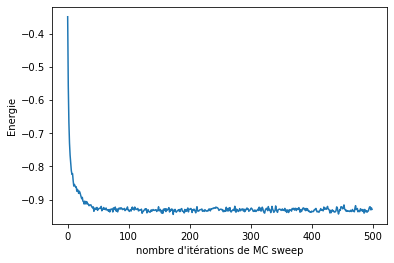

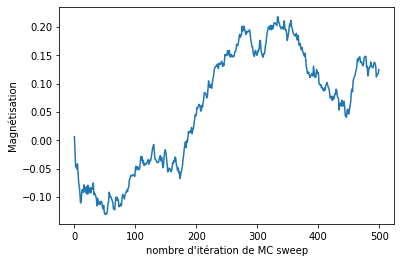

In [65]:
### Plot Energy/bond vs number of MC Sweeps and Magnetization/spin vs number of MC Sweeps ###
plt.plot(Energy)
plt.xlabel("nombre d'itérations de MC sweep")
plt.ylabel("Energie")
plt.show()
plt.plot(Magnetization)
plt.xlabel("nombre d'itération de MC sweep")
plt.ylabel("Magnétisation")
plt.show()

Plot the state of my system at different times. 

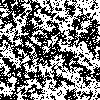

In [66]:
displayState(EvolutionState[0])

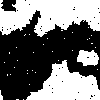

In [67]:
displayState(EvolutionState[30])

From the exploration above, One could discover that there is an equilibration process. The MC time required to reach equilibrium. I will now repeat all this for several values of 𝑇, starting from its extreme values. One cqn observe a marked change in behavior as a function of 𝑇.


## STEP 1: From the estimated equilibration time, run simulations that calculate average values of various quantities only after the equilibration is done. 

Create a list of temperatures I will use to study average values of different quantities. I also need to set the system size N, the number of **equilibration sweeps eqSweeps** and the number of sweeps over which you will be doing the averaging **mcSweeps**.

In [117]:
### TemperatureList in the range [1.5,4] ###
TemperatureList = np.linspace(1.5,4,100)

In [118]:
start_time = time.time()
N        =  30    # size of the lattice, N x N, start with 30x30
mcSweeps = 400     # number of MC sweeps for averaging
eqSweeps =  400   # number of equilibration sweeps before measurements; temperature dependent
Energy       = numpy.zeros(len(TemperatureList))   
Magnetization  = numpy.zeros(len(TemperatureList))
SpecificHeat = numpy.zeros(len(TemperatureList))   
Susceptibility = numpy.zeros(len(TemperatureList))
acceptanceRateList = numpy.zeros(len(TemperatureList))
EvolutionState = numpy.zeros((len(TemperatureList),N,N))

The MAIN **for loop** that goes through all the different temperatures from the **TemperatureList** and performs MC 
lattice sweeps and stores caclulated values of energy, magnetization, specific heat, susceptibility and the state of the system.


In [119]:
start_time = time.time()
for t in range(len(TemperatureList)):
    # create lookup table at each T
    Temperature = TemperatureList[t]
    table = BoltzmanTable(Temperature)

    # temporary variables used for calculation of system properties
    E1 = 0 
    M1 = 0 
    E2 = 0 
    M2 = 0

    # initial state of the system and initial acceptanceRate for a given temperature
    config = initialState(N)
    acceptanceRate = 0
    
    # perform equilibration process 
    for j in range(eqSweeps):      
        config, acceptance = MetropolisMCsweep(config, Temperature, table)                     
    for i in range(mcSweeps):
        config, acceptance = MetropolisMCsweep(config, Temperature, table)           
                  

        acceptanceRate+=acceptance
        Ene = calculateEnergy(config)               # calculate the energy
        Mag = calculateMagnetization(config)        # calculate the magnetisation    

        E1 = E1 + Ene
        M1 = M1 + Mag
        M2 = M2 + Mag*Mag 
        E2 = E2 + Ene*Ene

    # Calculate the remaining properties and store them in corresponding lists
    Energy[t]         = E1 / (2* N*N) / mcSweeps  # energy per bond
    Magnetization[t]  = M1 / (N*N) / mcSweeps # magnetization per spin
    SpecificHeat[t]   = (1/(Temperature*Temperature*N*N))*(E2/mcSweeps - (E1/mcSweeps)*(E1/mcSweeps))
    Susceptibility[t] = (N*N/Temperature)*(M2/mcSweeps - (M1/mcSweeps)*(M1/mcSweeps))
    EvolutionState[t] = config 
    acceptanceRateList[t] = acceptanceRate/(mcSweeps*N*N)
print("--- %s seconds ---" % (time.time() - start_time))

--- 289.16846108436584 seconds ---


## STEP 1:  Plot the averaged values of quantities in equilibrium, in particular, the energy, magnetization, heat capacity, and magnetic susceptibility. Plot the average values of these quantities as a function of T. One can observe signatures of the phase transition.

Like above, to plot the energy, magnetization, heat capacity and magnetic susceptibility, I use the subplots option.

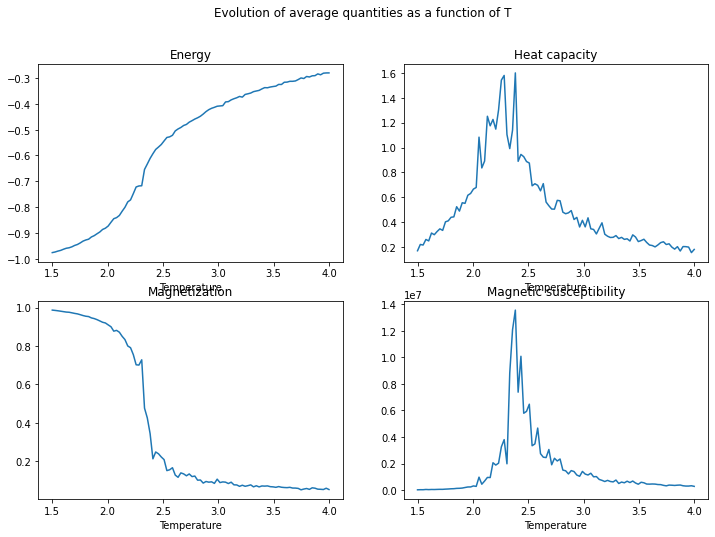

In [120]:
### Plot Energy/bond vs number of MC Sweeps and Magnetization/spin vs number of MC Sweeps ###
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].plot(TemperatureList,Energy)
axes[0,0].set_title('Energy')
axes[0,0].set_xlabel('Temperature')

axes[1, 0].plot(TemperatureList,Magnetization)
axes[1,0].set_title('Magnetization')
axes[1,0].set_xlabel('Temperature')

axes[0,1].plot(TemperatureList,SpecificHeat)
axes[0,1].set_title('Heat capacity')
axes[0,1].set_xlabel('Temperature')

axes[1,1].plot(TemperatureList,Susceptibility)
axes[1,1].set_title('Magnetic susceptibility')
axes[1,1].set_xlabel('Temperature')

fig.suptitle('Evolution of average quantities as a function of T')
plt.show()

Plot the state of my system at different temperatures. 

In [123]:
displayState(EvolutionState[20])

Extract the Curie temperature from my plots $T_C$. By finding the maximum of the magnetic susceptibility and the heat capacity


In [145]:
N = TemperatureList.shape[0] #= np.linspace(1.5,4,100)
T_ini = TemperatureList[0]
T_final = TemperatureList[N-1]

scale = (T_final - T_ini)/100

Tc_Heat = np.argmax(SpecificHeat)
Tc_suceptibility = np.argmax(Susceptibility)
Tc = (Tc_Heat + Tc_suceptibility)/2*scale + 1.5
print('The Curie temperature is', Tc)

The Curie temperature is 2.375
